In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
bikes = pd.read_csv('../data/bikeshare.csv', index_col='datetime', parse_dates=True)

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
bikes.rename({'count': 'total_rentals'}, axis=1, inplace=True)

In [19]:
X = bikes[['temp']]
y = bikes.total_rentals

In [20]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.intercept_

6.04621295961681

In [22]:
lr.coef_

array([9.17054048])

In [30]:
lr.predict(np.array([25]).reshape(-1, 1))

array([235.309725])

In [28]:
temps = np.array([[5], [6], [10]])
lr.predict(temps)

array([51.89891537, 61.06945585, 97.75161777])

In [31]:
bikes['temp_f'] = bikes['temp'] * 1.8 + 32

In [34]:
X = bikes[['temp_f']]
y = bikes['total_rentals']
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lr.predict(np.array([77]).reshape(-1, 1))

array([235.309725])

In [39]:
bikes['temp_f_squared'] = bikes['temp_f']**2

In [40]:
bikes.drop(['temp_f', 'temp_f_squared'], axis=1, inplace=True)

In [41]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
feature_cols = ['temp', 'season', 'humidity', 'weather']
X = bikes[feature_cols]
y = bikes.total_rentals

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
lr.intercept_

159.52068786129786

In [45]:
lr.coef_

array([ 7.86482499, 22.53875753, -3.11887338,  6.67030204])

In [46]:
lr.score(X, y)

0.25829758327282126

In [48]:
lr.predict(np.array([0, 0, 0, 0]).reshape(1, -1))

array([159.52068786])

In [51]:
(X - X.mean()) / X.std()

,temp,season,humidity,weather
datetime,,,,
2011-01-01 00:00:00,-1.333599,-1.349802,0.993167,-0.660148
2011-01-01 01:00:00,-1.438841,-1.349802,0.941206,-0.660148
2011-01-01 02:00:00,-1.438841,-1.349802,0.941206,-0.660148
2011-01-01 03:00:00,-1.333599,-1.349802,0.681399,-0.660148
2011-01-01 04:00:00,-1.333599,-1.349802,0.681399,-0.660148
2011-01-01 05:00:00,-1.333599,-1.349802,0.681399,0.917541
2011-01-01 06:00:00,-1.438841,-1.349802,0.941206,-0.660148
2011-01-01 07:00:00,-1.544083,-1.349802,1.252975,-0.660148
2011-01-01 08:00:00,-1.333599,-1.349802,0.681399,-0.660148


In [56]:
prices = pd.read_csv('../data/sacramento_real_estate_transactions.csv', index_col='sale_date', parse_dates=True)

C:\Users\Jonat\Anaconda\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [57]:
prices.head()

,beds,baths,sq__ft,price
sale_date,,,,
2008-05-21,2,1,836,59222
2008-05-21,3,1,1167,68212
2008-05-21,2,1,796,68880
2008-05-21,2,1,852,69307
2008-05-21,2,1,797,81900


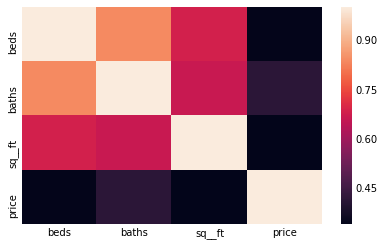

In [59]:
sns.heatmap(prices.corr());

In [60]:
prices.corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684999,0.344752
baths,0.839650,1.000000,0.665326,0.416718
sq__ft,0.684999,0.665326,1.000000,0.339628
price,0.344752,0.416718,0.339628,1.000000


In [61]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
X = prices.loc[:, prices.columns != 'price']
y = prices['price']

In [62]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lreg.intercept_

120538.95054891512

In [96]:
lreg.coef_

array([-10072.20660484,  54542.18571659,  17849.63081076])

In [67]:
print(list(zip(lreg.coef_, X.columns)))

[(-7700.862749680072, 'beds'), (60915.70979040685, 'baths'), (20.84937110107603, 'sq__ft')]


In [68]:
lreg.score(X, y)

0.18203162472419276

In [69]:
X_std = (X - X.mean()) / X.std()

In [70]:
X_std.describe()

,beds,baths,sq__ft
count,9.850000e+02,9.850000e+02,9.850000e+02
mean,6.572999e-16,6.989897e-16,2.123583e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.226167e+00,-1.984260e+00,-2.682930e+00
25%,-6.970354e-01,-8.674051e-01,-4.239095e-01
50%,6.753016e-02,2.494498e-01,-1.041764e-02
75%,8.320958e-01,2.494498e-01,4.731576e-01
max,3.890358e+00,3.600015e+00,5.266860e+00


In [71]:
lreg.fit(X_std, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lreg.score(X_std, y)

0.18203162472419276

In [73]:
lreg.coef_

array([-10072.20660484,  54542.18571659,  17849.63081076])

In [74]:
lreg.intercept_

233715.95126903552

In [76]:
prices['prediction'] = lreg.predict(X_std)

In [83]:
prices.head()

,beds,baths,sq__ft,price,prediction,residuals
sale_date,,,,,,
2008-05-21,2,1,836,59222,183483.009080,-124261.009080
2008-05-21,3,1,1167,68212,182683.288165,-114471.288165
2008-05-21,2,1,796,68880,182649.034236,-113769.034236
2008-05-21,2,1,852,69307,183816.599018,-114509.599018
2008-05-21,2,1,797,81900,182669.883607,-100769.883607


In [82]:
lreg.predict(X_std)

array([183483.00908041, 182683.28816523, 182649.03423636, 183816.59901803,
       182669.88360747, 181745.06646567, 242285.48757626, 182891.78187624,
       246587.90283644, 243161.16116251, 238219.86021153, 246142.62122997,
       191913.59981862, 179618.43061336, 248276.70189563, 250611.83145896,
       183649.80404922, 182628.18486526, 178312.36504732, 247539.52909375,
       242577.37877168, 239275.73332435, 237420.13929635, 252647.62501354,
       238053.06524272, 241951.89763864, 178430.01646059, 242598.22814278,
       240339.05125051, 245287.79701483, 248631.14120435, 243286.25738912,
       248039.91400018, 242535.68002947, 248631.14120435, 248832.19010202,
       241826.80141203, 242257.19339182, 235460.29841284, 189599.31962639,
       254156.22454616, 244432.97279968, 241284.7177634 , 248714.53868876,
       244654.87106845, 174002.5049738 , 244508.92547074, 191411.72984327,
       246093.47767443, 250062.30299699, 244036.83474876, 244717.41918176,
       249770.41180158, 2

In [77]:
prices['residuals'] = prices.price - prices.prediction

In [78]:
prices.head()

,beds,baths,sq__ft,price,prediction,residuals
sale_date,,,,,,
2008-05-21,2,1,836,59222,183483.009080,-124261.009080
2008-05-21,3,1,1167,68212,182683.288165,-114471.288165
2008-05-21,2,1,796,68880,182649.034236,-113769.034236
2008-05-21,2,1,852,69307,183816.599018,-114509.599018
2008-05-21,2,1,797,81900,182669.883607,-100769.883607


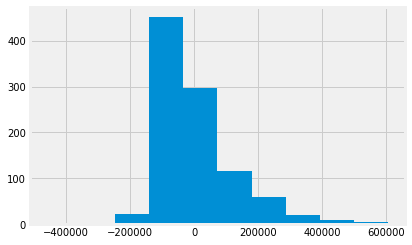

In [81]:
prices.residuals.hist();

In [80]:
prices.residuals.describe()

count    9.850000e+02
mean     3.598829e-11
std      1.257942e+05
min     -4.604842e+05
25%     -8.759420e+04
50%     -2.883219e+04
75%      5.023308e+04
max      6.065174e+05
Name: residuals, dtype: float64

In [84]:
lreg.score(X_std, y)

0.18203162472419276

In [89]:
SStot = sum((prices.price - prices.price.mean())**2)

In [90]:
SStot

19036168349347.656

In [93]:
SSres = sum(prices.residuals**2)

In [94]:
1 - (SSres/SStot)

0.18203162472419177